Anomaly detection using gaussian distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

from sklearn.metrics import f1_score
from scipy.stats import multivariate_normal

In [18]:
data = sio.loadmat('./data/ex8data1.mat')

In [19]:
X = data['X']
X.shape

(307, 2)

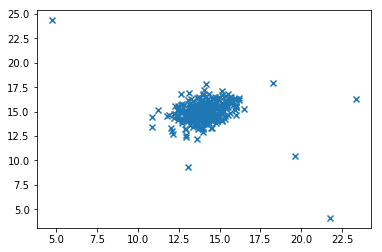

In [20]:
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],marker='x')
plt.show()

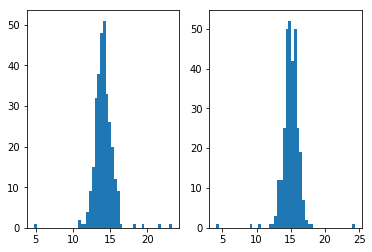

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(X[:,0], bins=50)
ax[1].hist(X[:,1], bins=50)
plt.show()

In [ ]:
def detect_anomaly(X, epsilon, mu, sigma2):
    ypred = np.array(multivariate_normal.pdf(X, mu, sigma2) < epsilon)
    return ypred

In [ ]:
detect_anomaly()

Selecting the threshold, ε

In [9]:
data = sio.loadmat('./data/ex8data2.mat')

In [10]:
X = data['X']
print(X.shape)
Xval = data['Xval']
print(Xval.shape)
yval = data['yval']
print('there are:', yval.sum(), 'anomalies' )

(1000, 11)
(100, 11)
there are: 10 anomalies


In [11]:
def detect_anomaly(X, epsilon, mu, sigma2):
    ypred = np.array(multivariate_normal.pdf(X, mu, sigma2) < epsilon)
    return ypred

In [12]:
def select_threshold(X, Xval, yval):
    mu = X.mean(axis=0)
    sigma2 = X.var(axis=0)
    
    f1_lower = 0
    epsilon_lower = 0 
    
    epsilon = [ 10**-x for x in range(40)]
    
    for e in epsilon:
        ypred = detect_anomaly(Xval, e, mu, sigma2)
        f1 = f1_score(yval, ypred, average=None)[1]
        
        if f1 > f1_lower: 
            f1_lower = f1
            epsilon_lower = e
            
    return f1_lower, epsilon_lower

In [13]:
select_threshold(X, Xval, yval)

/Users/tdetry/Documents/Python/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.7368421052631577, 1e-19)

In [15]:
ypred = detect_anomaly(Xval, 1e-19, X.mean(axis=0), X.var(axis=0))

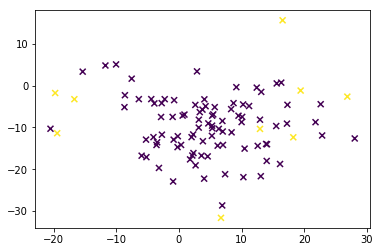

In [16]:
fig, ax = plt.subplots()
ax.scatter(Xval[:,0],Xval[:,1],marker='x',c=ypred)
plt.show()